In [1]:
import os 
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from pydicom import dcmread
import seaborn as sns

In [2]:
cwd = os.getcwd() 
print("Current working directory:", cwd)  

Current working directory: C:\Users\HEMANTH K


In [3]:
os.chdir(r"D:\AIML PROJ") 
cwd = os.getcwd() 
print("Current working directory:", cwd)

Current working directory: D:\AIML PROJ


In [4]:
df=pd.read_csv('stage_2_train_labels.csv')

In [5]:
df.shape

(30227, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
patientId    30227 non-null object
x            9555 non-null float64
y            9555 non-null float64
width        9555 non-null float64
height       9555 non-null float64
Target       30227 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [7]:
df.apply(lambda x: sum(x.isnull()))

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x,9555.0,394.047724,204.574172,2.0,207.0,324.0,594.0,835.0
y,9555.0,366.839560,148.940488,2.0,249.0,365.0,478.5,881.0
width,9555.0,218.471376,59.289475,40.0,177.0,217.0,259.0,528.0
height,9555.0,329.269702,157.750755,45.0,203.0,298.0,438.0,942.0
Target,30227.0,0.316108,0.464963,0.0,0.0,0.0,1.0,1.0


In [9]:
df_1=pd.read_csv('stage_2_detailed_class_info.csv')

In [10]:
df_1.head(10)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


In [11]:
df_1.shape

(30227, 2)

In [12]:
df_1['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [13]:
df['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

In [14]:
df_2 = df.merge(df_1, left_on= ('patientId'), right_on=('patientId'), how='inner').drop_duplicates()

In [15]:
df_2.head(10)

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity
6,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity
8,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
9,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
10,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,Lung Opacity
12,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,Lung Opacity


In [16]:
df_2.shape

(30227, 7)

In [17]:
df_2.head(10)

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity
6,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity
8,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
9,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
10,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,Lung Opacity
12,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,Lung Opacity


In [18]:
df_pneu = df_2[df_2['Target'] == 1]
df_pneu.shape

(9555, 7)

In [19]:
df_pneu.head(10)

,patientId,x,y,width,height,Target,class
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity
6,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity
10,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,Lung Opacity
12,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,Lung Opacity
18,00aecb01-a116-45a2-956c-08d2fa55433f,288.0,322.0,94.0,135.0,1,Lung Opacity
20,00aecb01-a116-45a2-956c-08d2fa55433f,547.0,299.0,119.0,165.0,1,Lung Opacity
22,00c0b293-48e7-4e16-ac76-9269ba535a62,306.0,544.0,168.0,244.0,1,Lung Opacity
24,00c0b293-48e7-4e16-ac76-9269ba535a62,650.0,511.0,206.0,284.0,1,Lung Opacity
27,00f08de1-517e-4652-a04f-d1dc9ee48593,181.0,184.0,206.0,506.0,1,Lung Opacity
29,00f08de1-517e-4652-a04f-d1dc9ee48593,571.0,275.0,230.0,476.0,1,Lung Opacity


In [20]:
def distTab(df, clN=None, bins=None):
    
    ## When the input is a series or list
    if type(df)==pd.core.series.Series:
        
        tmpDf = pd.DataFrame(df.value_counts(bins=bins))
        tmpDf = pd.merge(tmpDf,
                         pd.DataFrame(round(df.value_counts(bins=bins, normalize=True)*100,1)),
                         on=tmpDf.index)
        
        tmpDf.columns = ["Value", "Frequency", "Percentage"]
    
    ## When the input is a DataFrame or list
    if type(df)==pd.core.frame.DataFrame:
        
        tmpDf = pd.DataFrame(df[clN].value_counts(bins=bins))
        tmpDf = pd.merge(tmpDf,
                         pd.DataFrame(round(df[clN].value_counts(bins=bins, normalize=True)*100,1)),
                         on=tmpDf.index)
        
        tmpDf.columns = [clN, "Frequency", "Percentage"]
        
    else:
        
        df = pd.Series(df)
        
        tmpDf = pd.DataFrame(df.value_counts(bins=bins))
        tmpDf = pd.merge(tmpDf,
                         pd.DataFrame(round(df.value_counts(bins=bins, normalize=True)*100,1)),
                         on=tmpDf.index)
        
        tmpDf.columns = ["Value", "Frequency", "Percentage"]
        
    return(tmpDf)

In [21]:
def showXrayImg(imgArr, targ=1, ind=0, figSz=(10, 5)):
    
    if type(ind)!=np.dtype('str'):
        id0 = np.where(Y.Target==0)[0][ind]
        id1 = np.where(Y.Target==1)[0][ind]

        if targ==1:
            idx = id1

        else:
            idx = id0
    
    else:
        idx = np.where(Y.patientId==ind)[0]
        
    
    ptntI = Y.patientId[idx]
    boxP = Y.x.notnull()[idx]
    targF = Y.Target[idx]
    Yflt = Y[['x','y','width','height']].iloc[idx]
    
    try:
        ptntI = ptntI.unique()[0]
        boxP = boxP.unique()[0]
        targF = targF.unique()[0]

    except:
        ptntI = ptntI
        boxP = boxP
        targF = targF
        Yflt = pd.DataFrame(Yflt).transpose()

    
    fig, ax = plt.subplots(1, 2, figsize = figSz)
    
    ax[0].imshow(imgArr, cmap='bone')
    ax[0].set_title('Original X-ray Target {} for patientid\n {}'.format(targF,ptntI))

    if boxP:

        ax[1].imshow(imgArr, cmap='bone')
        ax[1].set_title('X-ray with Bounding Box Target {} for patientid\n {}'.format(targF,ptntI))

        for i, row in Yflt.iterrows():
            ax[1].plot(row['x'], row['y'])
            ax[1].add_patch(Rectangle(xy=(row['x'], row['y']),
                                      width=row['width'],
                                      height=row['height'], 
                                      color='y', alpha=0.3))

    ax[0].axis('off')
    ax[1].axis('off')

In [22]:
vars = [ 'PatientAge', 'PatientSex', 'ViewPosition']

def process_dicom_data(data_df, data_path):
    for var in vars:
        data_df[var] = None
    image_names = data_df.patientId
    for i, img_name in tqdm_notebook(enumerate(image_names)):
        imagePath = cwd+'/'+data_path+'/'+img_name+".dcm"
        data_row_img_data = pydicom.read_file(imagePath)
        idx = (data_df['patientId']==data_row_img_data.PatientID)
        #data_df.loc[idx,'Modality'] = data_row_img_data.Modality
        data_df.loc[idx,'PatientAge'] = pd.to_numeric(data_row_img_data.PatientAge)
        data_df.loc[idx,'PatientSex'] = data_row_img_data.PatientSex
        #data_df.loc[idx,'BodyPartExamined'] = data_row_img_data.BodyPartExamined
        data_df.loc[idx,'ViewPosition'] = data_row_img_data.ViewPosition
        #data_df.loc[idx,'ConversionType'] = data_row_img_data.ConversionType
        #data_df.loc[idx,'Rows'] = data_row_img_data.Rows
        #data_df.loc[idx,'Columns'] = data_row_img_data.Columns  
        #data_df.loc[idx,'PixelSpacing'] = str.format("{:4.3f}",data_row_img_data.PixelSpacing[0]) 

In [23]:
# Extracting height and width of all the training images
def imgShape(dictX):
    imgShape = [[],[]]
    
    if type(dictX)==dict:
        for v in dictX.values():

            imgShape[0].append(v.shape[0])
            imgShape[1].append(v.shape[1])
    
    if type(dictX)==list:
        for v in dictX:

            imgShape[0].append(v.shape[0])
            imgShape[1].append(v.shape[1])

    # Creating dataframe
    imgShape = pd.DataFrame({

        'height': imgShape[0],
        'width': imgShape[0],

    })
    
    return(imgShape)

In [24]:
Y=df_pneu
Y.shape

(9555, 7)

In [25]:
Y

,patientId,x,y,width,height,Target,class
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity
6,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity
10,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1,Lung Opacity
12,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1,Lung Opacity
18,00aecb01-a116-45a2-956c-08d2fa55433f,288.0,322.0,94.0,135.0,1,Lung Opacity
20,00aecb01-a116-45a2-956c-08d2fa55433f,547.0,299.0,119.0,165.0,1,Lung Opacity
22,00c0b293-48e7-4e16-ac76-9269ba535a62,306.0,544.0,168.0,244.0,1,Lung Opacity
24,00c0b293-48e7-4e16-ac76-9269ba535a62,650.0,511.0,206.0,284.0,1,Lung Opacity
27,00f08de1-517e-4652-a04f-d1dc9ee48593,181.0,184.0,206.0,506.0,1,Lung Opacity
29,00f08de1-517e-4652-a04f-d1dc9ee48593,571.0,275.0,230.0,476.0,1,Lung Opacity


In [26]:
import pydicom
import os
os.chdir(r"D:\AIML PROJ\stage_2_train_images") 
trainXPth = os.getcwd() 
print("Current working directory:", trainXPth)
#trainXPth='stage_2_train_images'
sampNum = 2000 # Number of samples to import
X = [] # Empty to read training images

print("Before sampling\n")
print("Total training unique patient ids: ",df_pneu['patientId'].nunique())
print("Number of images in train set:", len(os.listdir(trainXPth)))
print("\n")
print("Total training labels {}" .format(df_pneu.shape))
display(distTab(df_pneu, "Target")) # Dsitribution of target before sampling

print("\n\nAfter sampling\n")
Y = df_pneu.sample(n=sampNum, random_state=2) # Sampling
#Y=df_pneu
Y.reset_index(drop=True, inplace=True)
print("Total sampled training labels {}" .format(Y.shape))
display(distTab(Y, "Target"))  # Dsitribution of target after sampling


for indx in Y.patientId:
  
    try:
        
        X.append(pydicom.dcmread(indx+'.dcm'))
        
    except:
        
        continue
print(indx)
ds=pydicom.dcmread(indx+'.dcm')
print(X)
X = dict(zip([x.PatientID for x in X], [x.pixel_array for x in X])) # Dictionary for training images for patient id's
print("\n\nTotal sampled training images {}" .format(len(X)))

Y = Y[Y.patientId.isin(X.keys())]
print("Total training labels {}" .format(Y.shape))

# Shape of images
imgShape(X).describe()

Current working directory: D:\AIML PROJ\stage_2_train_images
Before sampling

Total training unique patient ids:  6012
Number of images in train set: 26686


Total training labels (9555, 7)


,Target,Frequency,Percentage
0,1,9555,100.0




After sampling

Total sampled training labels (2000, 7)


,Target,Frequency,Percentage
0,1,2000,100.0


bc54c1d6-8a51-4bae-adaf-d2b7ec7c4323


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)






Total sampled training images 1833
Total training labels (2000, 7)


,height,width
count,1833.0,1833.0
mean,1024.0,1024.0
std,0.0,0.0
min,1024.0,1024.0
25%,1024.0,1024.0
50%,1024.0,1024.0
75%,1024.0,1024.0
max,1024.0,1024.0


In [27]:
pydicom.read_file(Y.patientId[0]+".dcm")

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.5020.1517874310.962377
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.5020.1517874310.962377
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [28]:
## Adding the metadata to the latest dataset
from tqdm import tqdm_notebook
process_dicom_data(Y,'stage_2_train_images')


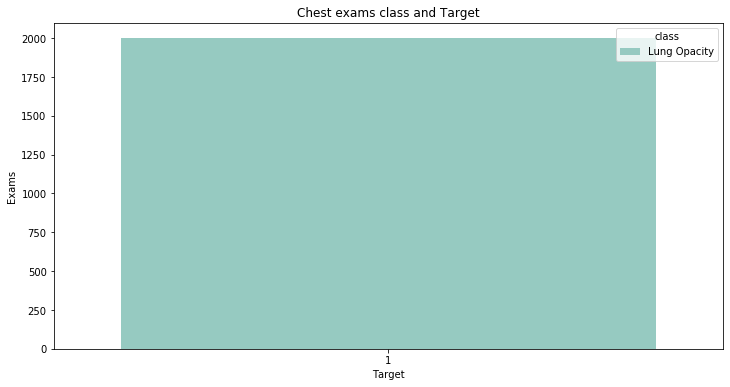

In [29]:
## Viewing the class distribution

fig, ax = plt.subplots(nrows=1,figsize=(12,6))
tmp = Y.groupby('Target')['class'].value_counts()
df = pd.DataFrame(data={'Exams': tmp.values}, index=tmp.index).reset_index()
sns.barplot(ax=ax,x = 'Target', y='Exams',hue='class',data=df, palette='Set3')
plt.title("Chest exams class and Target")
plt.show()

In [30]:
Y.sample(10)

,patientId,x,y,width,height,Target,class,PatientAge,PatientSex,ViewPosition
662,cf8aa442-74cf-4610-8b1d-980d662bdcc4,582.0,271.0,199.0,341.0,1,Lung Opacity,44,M,AP
1251,f92ddac9-aba6-4607-ba72-6ab7e8776fef,622.0,185.0,232.0,484.0,1,Lung Opacity,67,F,AP
1968,f7250628-0db8-4baa-adbf-fd694cbd3b7d,511.0,422.0,202.0,387.0,1,Lung Opacity,15,M,AP
324,a8caec22-eaf7-4acf-bbb8-fa3cdf4f69d5,606.0,317.0,206.0,401.0,1,Lung Opacity,67,F,AP
620,1b4d9ebb-644e-4602-ad36-d83cf7415be6,226.0,624.0,141.0,142.0,1,Lung Opacity,64,M,AP
1152,bcdd92c8-2cde-4899-a6fc-46b875aaab62,147.0,438.0,233.0,255.0,1,Lung Opacity,65,F,AP
1901,87c837b2-2bcb-424f-9ba3-c49aea7b3860,558.0,280.0,243.0,482.0,1,Lung Opacity,12,F,AP
638,1bf6fe95-9953-4e27-a71e-4dfbfa81e63b,287.0,254.0,82.0,70.0,1,Lung Opacity,66,F,AP
1645,c96584fc-6d79-4c0d-ae59-ddee6436f1e9,602.0,352.0,246.0,482.0,1,Lung Opacity,36,F,AP
271,ad587880-a108-4b52-bf4a-28d248bb1539,565.0,313.0,189.0,278.0,1,Lung Opacity,52,M,AP


In [31]:
Y

,patientId,x,y,width,height,Target,class,PatientAge,PatientSex,ViewPosition
0,7002c25e-83ce-4af1-9cdb-a9d4899d6104,461.0,207.0,214.0,571.0,1,Lung Opacity,74,F,AP
1,6a5d55af-fc99-4957-9404-f08e4150dc55,204.0,448.0,116.0,63.0,1,Lung Opacity,40,F,AP
2,3f151141-a3bb-47aa-a213-4a90e8c55502,540.0,349.0,225.0,437.0,1,Lung Opacity,40,M,AP
3,4206173d-0db2-4f32-80fb-0bd99d5532e1,570.0,402.0,255.0,199.0,1,Lung Opacity,41,M,PA
4,bcee03c8-2ff9-4b01-a6d6-a4ee99565d81,609.0,266.0,201.0,670.0,1,Lung Opacity,50,F,AP
5,4bc8ce99-2420-48c2-a768-d067da67ced2,552.0,209.0,226.0,460.0,1,Lung Opacity,36,F,AP
6,e5ee965b-7a79-4ceb-986c-a775a3c1d7a8,628.0,244.0,192.0,265.0,1,Lung Opacity,42,F,AP
7,b12ab5b1-c824-4776-b859-df3ee1817269,675.0,522.0,212.0,233.0,1,Lung Opacity,38,M,AP
8,cb815f3a-5014-4bbe-9e34-828149ba9f6e,568.0,259.0,224.0,417.0,1,Lung Opacity,33,F,AP
9,e6a3f420-39d4-4042-8485-87024e7fb4f3,718.0,590.0,132.0,197.0,1,Lung Opacity,61,M,PA


In [32]:
distTab(Y, 'Target')

,Target,Frequency,Percentage
0,1,2000,100.0


In [33]:
distTab(Y, 'class')

,class,Frequency,Percentage
0,Lung Opacity,2000,100.0


In [34]:
Y[Y.patientId=="e6a3f420-39d4-4042-8485-87024e7fb4f3"]

,patientId,x,y,width,height,Target,class,PatientAge,PatientSex,ViewPosition
9,e6a3f420-39d4-4042-8485-87024e7fb4f3,718.0,590.0,132.0,197.0,1,Lung Opacity,61,M,PA
1423,e6a3f420-39d4-4042-8485-87024e7fb4f3,230.0,659.0,200.0,116.0,1,Lung Opacity,61,M,PA


In [35]:
pd.crosstab(Y.ViewPosition,Y.Target).replace(0,np.nan).\
     stack().reset_index().rename(columns={0:'Count'})

,ViewPosition,Target,Count
0,AP,1,1619
1,PA,1,381


In [36]:
print("Total number of patient id's present is {}" .format(Y.patientId.shape[0]))
print("Total number of unique patient id's present is {}" .format(Y.patientId.unique().shape[0]))

Total number of patient id's present is 2000
Total number of unique patient id's present is 1833


In [37]:
(Y[Y["Target"]==1].groupby(["patientId"]).size()).value_counts(normalize=True)*100


1    90.943808
2     9.001637
3     0.054555
dtype: float64

In [38]:
dict(list(X.items())[0:9545]) # Take a look at the image arrays

{'7002c25e-83ce-4af1-9cdb-a9d4899d6104': array([[ 38,  73,  62, ...,  11,  12,   4],
        [ 86, 133, 129, ...,  21,  22,  14],
        [ 74, 130, 130, ...,  20,  21,  13],
        ...,
        [124, 222, 217, ..., 193, 196, 108],
        [141, 230, 227, ..., 198, 201, 122],
        [ 60, 120, 101, ...,  90, 107,  55]], dtype=uint8),
 '6a5d55af-fc99-4957-9404-f08e4150dc55': array([[  1,   2,   2, ...,   2,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        [  2,   2,   3, ...,   3,   3,   2],
        ...,
        [ 22,  36,  33, ..., 145, 154,  89],
        [ 21,  34,  30, ..., 149, 157, 100],
        [  8,  19,  14, ...,  71,  85,  36]], dtype=uint8),
 '3f151141-a3bb-47aa-a213-4a90e8c55502': array([[1, 1, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 3, 3, ..., 2, 2, 2],
        ...,
        [2, 3, 3, ..., 5, 4, 3],
        [2, 2, 2, ..., 4, 3, 2],
        [1, 1, 2, ..., 3, 2, 1]], dtype=uint8),
 '4206173d-0db2-4f32-80fb-0bd99d5532e1': array([[ 30,  28,

In [39]:
patientIdDist = distTab(Y, "patientId")
display(patientIdDist) # Finding patient id's with multiple bounding boxes

,patientId,Frequency,Percentage
0,e5ee965b-7a79-4ceb-986c-a775a3c1d7a8,3,0.2
1,3747c54e-e425-451d-90c0-943e99b873d4,2,0.1
2,bcfbbdcc-f648-4e72-931b-1747f502eb35,2,0.1
3,bcab0525-079e-492e-8e20-c51c779884aa,2,0.1
4,f743c21e-5876-460b-bbd6-2e2dcca41baa,2,0.1
5,7c1d3e58-174d-450f-9f19-caad0cdce430,2,0.1
6,a2a84bc3-c75b-4df6-840d-e118b61594d4,2,0.1
7,427412d0-cf4c-4a13-b58e-6ffdd004c6ec,2,0.1
8,2af2646f-3cc0-4ef2-a9e4-0beea36f335a,2,0.1
9,3533d3a6-27af-4d2b-a232-ce489a2148d9,2,0.1


In [40]:
from matplotlib.patches import Rectangle
def show_dicome_with_boundingbox(data_df):
    img_data = list(data_df.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        pid = data_row['patientId']
        dcm_file = '%s.dcm' % pid
        dcm_data = pydicom.read_file(dcm_file)                    
        ax[i//3, i%3].imshow(dcm_data.pixel_array, cmap=plt.cm.bone)
        ax[i//3, i%3].set_title('ID: {}\n Age: {} Sex: {}'.format(
                data_row['patientId'],dcm_data.PatientAge, dcm_data.PatientSex))
        rows = data_df[data_df['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())        
        for j, row in enumerate(box_data):            
            x,y,width,height = row['x'], row['y'],row['width'],row['height']
            rectangle = Rectangle(xy=(x,y),width=width, height=height, color="green",alpha = 0.1)
            ax[i//3, i%3].add_patch(rectangle)

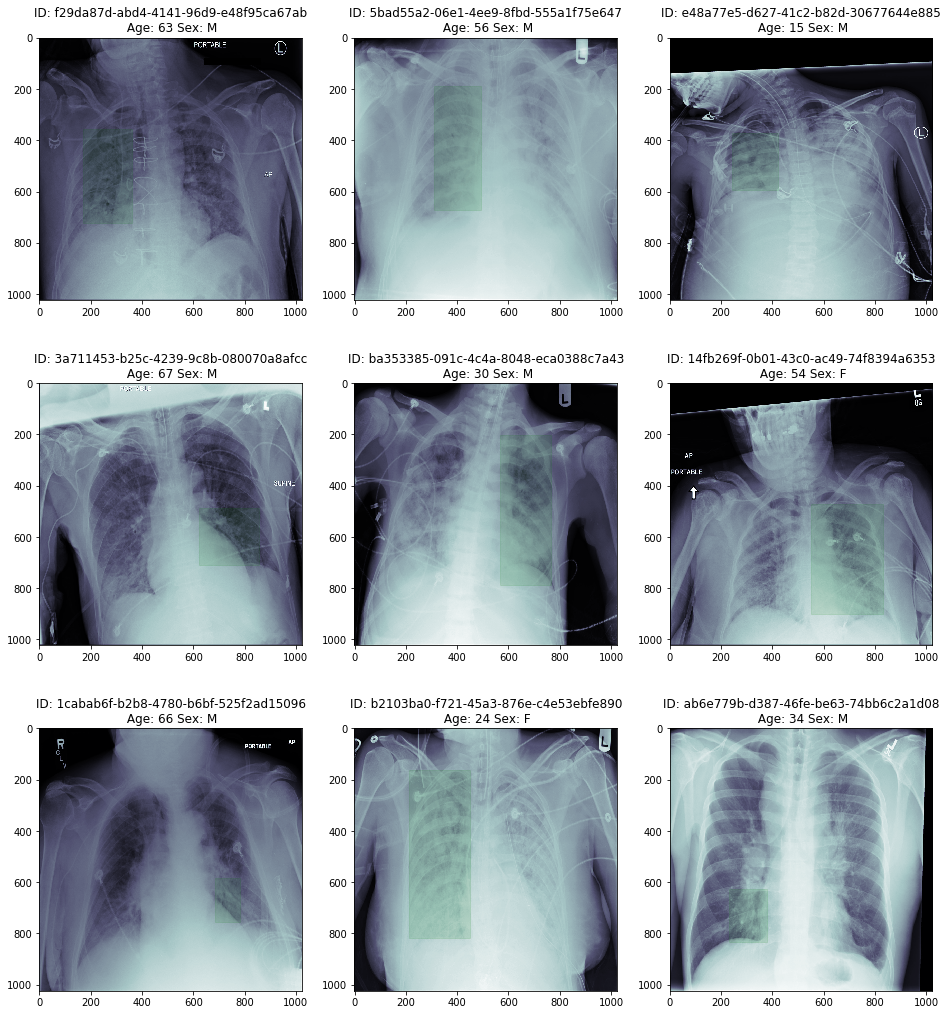

In [41]:
show_dicome_with_boundingbox(Y[Y['Target']==1].sample(n=9))

In [42]:
data_1=X.keys()

In [43]:
type(data_1)

dict_keys

In [44]:
newlist = list()
for i in X.keys():
    newlist.append(i)


In [45]:
X.values()

dict_values([array([[ 38,  73,  62, ...,  11,  12,   4],
       [ 86, 133, 129, ...,  21,  22,  14],
       [ 74, 130, 130, ...,  20,  21,  13],
       ...,
       [124, 222, 217, ..., 193, 196, 108],
       [141, 230, 227, ..., 198, 201, 122],
       [ 60, 120, 101, ...,  90, 107,  55]], dtype=uint8), array([[  1,   2,   2, ...,   2,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       [  2,   2,   3, ...,   3,   3,   2],
       ...,
       [ 22,  36,  33, ..., 145, 154,  89],
       [ 21,  34,  30, ..., 149, 157, 100],
       [  8,  19,  14, ...,  71,  85,  36]], dtype=uint8), array([[1, 1, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 3, 3, ..., 2, 2, 2],
       ...,
       [2, 3, 3, ..., 5, 4, 3],
       [2, 2, 2, ..., 4, 3, 2],
       [1, 1, 2, ..., 3, 2, 1]], dtype=uint8), array([[ 30,  28,  23, ..., 144, 156, 176],
       [ 30,  27,  23, ..., 129, 141, 161],
       [ 29,  26,  22, ..., 116, 129, 150],
       ...,
       [ 21,  19,  18, ..., 119, 119, 119]

In [46]:
values = X.values()
values_list = list(values)
print(values_list)

[array([[ 38,  73,  62, ...,  11,  12,   4],
       [ 86, 133, 129, ...,  21,  22,  14],
       [ 74, 130, 130, ...,  20,  21,  13],
       ...,
       [124, 222, 217, ..., 193, 196, 108],
       [141, 230, 227, ..., 198, 201, 122],
       [ 60, 120, 101, ...,  90, 107,  55]], dtype=uint8), array([[  1,   2,   2, ...,   2,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       [  2,   2,   3, ...,   3,   3,   2],
       ...,
       [ 22,  36,  33, ..., 145, 154,  89],
       [ 21,  34,  30, ..., 149, 157, 100],
       [  8,  19,  14, ...,  71,  85,  36]], dtype=uint8), array([[1, 1, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 3, 3, ..., 2, 2, 2],
       ...,
       [2, 3, 3, ..., 5, 4, 3],
       [2, 2, 2, ..., 4, 3, 2],
       [1, 1, 2, ..., 3, 2, 1]], dtype=uint8), array([[ 30,  28,  23, ..., 144, 156, 176],
       [ 30,  27,  23, ..., 129, 141, 161],
       [ 29,  26,  22, ..., 116, 129, 150],
       ...,
       [ 21,  19,  18, ..., 119, 119, 119],
       [ 2

In [47]:
newlist

['7002c25e-83ce-4af1-9cdb-a9d4899d6104',
 '6a5d55af-fc99-4957-9404-f08e4150dc55',
 '3f151141-a3bb-47aa-a213-4a90e8c55502',
 '4206173d-0db2-4f32-80fb-0bd99d5532e1',
 'bcee03c8-2ff9-4b01-a6d6-a4ee99565d81',
 '4bc8ce99-2420-48c2-a768-d067da67ced2',
 'e5ee965b-7a79-4ceb-986c-a775a3c1d7a8',
 'b12ab5b1-c824-4776-b859-df3ee1817269',
 'cb815f3a-5014-4bbe-9e34-828149ba9f6e',
 'e6a3f420-39d4-4042-8485-87024e7fb4f3',
 '0da8c767-77b7-4c69-98d4-2c5c91b9affc',
 'd373b335-d9d9-4594-b97e-03ec9aa8daa2',
 '7c9248d5-b2bc-4359-9667-108109a2de2e',
 'f9a571b8-65a5-463c-8ee7-db2f3728f5d2',
 '98abcf3d-aa93-49e0-af76-029af14e6aa7',
 '6804008c-94eb-4870-ba6e-b06514073e71',
 '7c1d3e58-174d-450f-9f19-caad0cdce430',
 'f184f903-7ec4-4b69-8ac1-1f2d171065ef',
 'bc5360ed-0247-47b8-93a0-c34ebbf936bb',
 '24c876fa-93e4-4dd6-b1f1-a6f5f4aab729',
 '358a25c3-ecbc-490b-b887-1594168f4dab',
 'bbafb79d-3419-47a4-97f0-1cb8c64feb24',
 'b011429a-7f44-413c-af22-93b110e9710b',
 '65f61ec4-b763-4d94-93ef-135e22717e12',
 '5d76b90a-e59d-

In [48]:
X_df = pd.DataFrame({'patientId':newlist,'imageArray':values_list})

data_frame = Y.merge(X_df, on='patientId', how='left')

In [50]:
data_frame.head(10)

,patientId,x,y,width,height,Target,class,PatientAge,PatientSex,ViewPosition,imageArray
0,7002c25e-83ce-4af1-9cdb-a9d4899d6104,461.0,207.0,214.0,571.0,1,Lung Opacity,74,F,AP,"[[38, 73, 62, 67, 65, 68, 70, 70, 71, 65, 68, ..."
1,6a5d55af-fc99-4957-9404-f08e4150dc55,204.0,448.0,116.0,63.0,1,Lung Opacity,40,F,AP,"[[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
2,3f151141-a3bb-47aa-a213-4a90e8c55502,540.0,349.0,225.0,437.0,1,Lung Opacity,40,M,AP,"[[1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
3,4206173d-0db2-4f32-80fb-0bd99d5532e1,570.0,402.0,255.0,199.0,1,Lung Opacity,41,M,PA,"[[30, 28, 23, 19, 16, 14, 13, 12, 10, 9, 9, 8,..."
4,bcee03c8-2ff9-4b01-a6d6-a4ee99565d81,609.0,266.0,201.0,670.0,1,Lung Opacity,50,F,AP,"[[2, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,..."
5,4bc8ce99-2420-48c2-a768-d067da67ced2,552.0,209.0,226.0,460.0,1,Lung Opacity,36,F,AP,"[[51, 103, 83, 86, 77, 74, 72, 67, 65, 58, 61,..."
6,e5ee965b-7a79-4ceb-986c-a775a3c1d7a8,628.0,244.0,192.0,265.0,1,Lung Opacity,42,F,AP,"[[0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,..."
7,b12ab5b1-c824-4776-b859-df3ee1817269,675.0,522.0,212.0,233.0,1,Lung Opacity,38,M,AP,"[[0, 86, 145, 139, 139, 137, 137, 138, 137, 13..."
8,cb815f3a-5014-4bbe-9e34-828149ba9f6e,568.0,259.0,224.0,417.0,1,Lung Opacity,33,F,AP,"[[0, 13, 50, 39, 36, 36, 36, 33, 31, 30, 28, 2..."
9,e6a3f420-39d4-4042-8485-87024e7fb4f3,718.0,590.0,132.0,197.0,1,Lung Opacity,61,M,PA,"[[198, 196, 193, 191, 190, 189, 187, 185, 185,..."


In [51]:
Y.head()

,patientId,x,y,width,height,Target,class,PatientAge,PatientSex,ViewPosition
0,7002c25e-83ce-4af1-9cdb-a9d4899d6104,461.0,207.0,214.0,571.0,1,Lung Opacity,74,F,AP
1,6a5d55af-fc99-4957-9404-f08e4150dc55,204.0,448.0,116.0,63.0,1,Lung Opacity,40,F,AP
2,3f151141-a3bb-47aa-a213-4a90e8c55502,540.0,349.0,225.0,437.0,1,Lung Opacity,40,M,AP
3,4206173d-0db2-4f32-80fb-0bd99d5532e1,570.0,402.0,255.0,199.0,1,Lung Opacity,41,M,PA
4,bcee03c8-2ff9-4b01-a6d6-a4ee99565d81,609.0,266.0,201.0,670.0,1,Lung Opacity,50,F,AP


In [52]:
Y['x-max'] = Y['x'] + Y['width']

In [53]:
Y['y-max'] = Y['y'] + Y['height']

In [54]:
final = pd.DataFrame(Y[['patientId','x','x-max','y','y-max','width','height','Target','class']])


In [55]:
final.head(3)

,patientId,x,x-max,y,y-max,width,height,Target,class
0,7002c25e-83ce-4af1-9cdb-a9d4899d6104,461.0,675.0,207.0,778.0,214.0,571.0,1,Lung Opacity
1,6a5d55af-fc99-4957-9404-f08e4150dc55,204.0,320.0,448.0,511.0,116.0,63.0,1,Lung Opacity
2,3f151141-a3bb-47aa-a213-4a90e8c55502,540.0,765.0,349.0,786.0,225.0,437.0,1,Lung Opacity


In [56]:
final.to_csv("train_annotation_csv.txt",index=None)

In [57]:
df=pd.read_csv('train_annotation_csv.txt')

In [58]:
df.head(10)

,patientId,x,x-max,y,y-max,width,height,Target,class
0,7002c25e-83ce-4af1-9cdb-a9d4899d6104,461.0,675.0,207.0,778.0,214.0,571.0,1,Lung Opacity
1,6a5d55af-fc99-4957-9404-f08e4150dc55,204.0,320.0,448.0,511.0,116.0,63.0,1,Lung Opacity
2,3f151141-a3bb-47aa-a213-4a90e8c55502,540.0,765.0,349.0,786.0,225.0,437.0,1,Lung Opacity
3,4206173d-0db2-4f32-80fb-0bd99d5532e1,570.0,825.0,402.0,601.0,255.0,199.0,1,Lung Opacity
4,bcee03c8-2ff9-4b01-a6d6-a4ee99565d81,609.0,810.0,266.0,936.0,201.0,670.0,1,Lung Opacity
5,4bc8ce99-2420-48c2-a768-d067da67ced2,552.0,778.0,209.0,669.0,226.0,460.0,1,Lung Opacity
6,e5ee965b-7a79-4ceb-986c-a775a3c1d7a8,628.0,820.0,244.0,509.0,192.0,265.0,1,Lung Opacity
7,b12ab5b1-c824-4776-b859-df3ee1817269,675.0,887.0,522.0,755.0,212.0,233.0,1,Lung Opacity
8,cb815f3a-5014-4bbe-9e34-828149ba9f6e,568.0,792.0,259.0,676.0,224.0,417.0,1,Lung Opacity
9,e6a3f420-39d4-4042-8485-87024e7fb4f3,718.0,850.0,590.0,787.0,132.0,197.0,1,Lung Opacity


In [59]:
train_list=[]
patientId=[]
for pid in df['patientId']:
    patientId.append(pid)
    pid=pid+'.dcm'
    train_list.append(pid)

In [60]:
patientId

['7002c25e-83ce-4af1-9cdb-a9d4899d6104',
 '6a5d55af-fc99-4957-9404-f08e4150dc55',
 '3f151141-a3bb-47aa-a213-4a90e8c55502',
 '4206173d-0db2-4f32-80fb-0bd99d5532e1',
 'bcee03c8-2ff9-4b01-a6d6-a4ee99565d81',
 '4bc8ce99-2420-48c2-a768-d067da67ced2',
 'e5ee965b-7a79-4ceb-986c-a775a3c1d7a8',
 'b12ab5b1-c824-4776-b859-df3ee1817269',
 'cb815f3a-5014-4bbe-9e34-828149ba9f6e',
 'e6a3f420-39d4-4042-8485-87024e7fb4f3',
 '0da8c767-77b7-4c69-98d4-2c5c91b9affc',
 'd373b335-d9d9-4594-b97e-03ec9aa8daa2',
 '7c9248d5-b2bc-4359-9667-108109a2de2e',
 'f9a571b8-65a5-463c-8ee7-db2f3728f5d2',
 '98abcf3d-aa93-49e0-af76-029af14e6aa7',
 '6804008c-94eb-4870-ba6e-b06514073e71',
 '7c1d3e58-174d-450f-9f19-caad0cdce430',
 'f184f903-7ec4-4b69-8ac1-1f2d171065ef',
 'bc5360ed-0247-47b8-93a0-c34ebbf936bb',
 '24c876fa-93e4-4dd6-b1f1-a6f5f4aab729',
 '358a25c3-ecbc-490b-b887-1594168f4dab',
 'bbafb79d-3419-47a4-97f0-1cb8c64feb24',
 'b011429a-7f44-413c-af22-93b110e9710b',
 '65f61ec4-b763-4d94-93ef-135e22717e12',
 '5d76b90a-e59d-

In [61]:
train_list

['7002c25e-83ce-4af1-9cdb-a9d4899d6104.dcm',
 '6a5d55af-fc99-4957-9404-f08e4150dc55.dcm',
 '3f151141-a3bb-47aa-a213-4a90e8c55502.dcm',
 '4206173d-0db2-4f32-80fb-0bd99d5532e1.dcm',
 'bcee03c8-2ff9-4b01-a6d6-a4ee99565d81.dcm',
 '4bc8ce99-2420-48c2-a768-d067da67ced2.dcm',
 'e5ee965b-7a79-4ceb-986c-a775a3c1d7a8.dcm',
 'b12ab5b1-c824-4776-b859-df3ee1817269.dcm',
 'cb815f3a-5014-4bbe-9e34-828149ba9f6e.dcm',
 'e6a3f420-39d4-4042-8485-87024e7fb4f3.dcm',
 '0da8c767-77b7-4c69-98d4-2c5c91b9affc.dcm',
 'd373b335-d9d9-4594-b97e-03ec9aa8daa2.dcm',
 '7c9248d5-b2bc-4359-9667-108109a2de2e.dcm',
 'f9a571b8-65a5-463c-8ee7-db2f3728f5d2.dcm',
 '98abcf3d-aa93-49e0-af76-029af14e6aa7.dcm',
 '6804008c-94eb-4870-ba6e-b06514073e71.dcm',
 '7c1d3e58-174d-450f-9f19-caad0cdce430.dcm',
 'f184f903-7ec4-4b69-8ac1-1f2d171065ef.dcm',
 'bc5360ed-0247-47b8-93a0-c34ebbf936bb.dcm',
 '24c876fa-93e4-4dd6-b1f1-a6f5f4aab729.dcm',
 '358a25c3-ecbc-490b-b887-1594168f4dab.dcm',
 'bbafb79d-3419-47a4-97f0-1cb8c64feb24.dcm',
 'b011429a

In [65]:
import cv2
import os
import pydicom
#inputdir = 'stage_2_train_images'
os.chdir(r"D:\AIML PROJ") 
cwd = os.getcwd()
cwd
inputdir = 'stage_2_train_images'
outdir = 'train_img'
for f in train_list:   # remove "[:10]" to convert all images 
    ds = pydicom.read_file(os.path.join(inputdir,f)) # read dicom image
    img = ds.pixel_array # get image array
    cv2.imwrite(os.path.join(outdir,f.replace('.dcm','.png')),img) # write png image
    

In [67]:
images=[]
for f in patientId:
    f=f+'.png' 
    path_png=os.path.join(outdir,f)
    images.append( path_png)

In [68]:
images

['train_img\\7002c25e-83ce-4af1-9cdb-a9d4899d6104.png',
 'train_img\\6a5d55af-fc99-4957-9404-f08e4150dc55.png',
 'train_img\\3f151141-a3bb-47aa-a213-4a90e8c55502.png',
 'train_img\\4206173d-0db2-4f32-80fb-0bd99d5532e1.png',
 'train_img\\bcee03c8-2ff9-4b01-a6d6-a4ee99565d81.png',
 'train_img\\4bc8ce99-2420-48c2-a768-d067da67ced2.png',
 'train_img\\e5ee965b-7a79-4ceb-986c-a775a3c1d7a8.png',
 'train_img\\b12ab5b1-c824-4776-b859-df3ee1817269.png',
 'train_img\\cb815f3a-5014-4bbe-9e34-828149ba9f6e.png',
 'train_img\\e6a3f420-39d4-4042-8485-87024e7fb4f3.png',
 'train_img\\0da8c767-77b7-4c69-98d4-2c5c91b9affc.png',
 'train_img\\d373b335-d9d9-4594-b97e-03ec9aa8daa2.png',
 'train_img\\7c9248d5-b2bc-4359-9667-108109a2de2e.png',
 'train_img\\f9a571b8-65a5-463c-8ee7-db2f3728f5d2.png',
 'train_img\\98abcf3d-aa93-49e0-af76-029af14e6aa7.png',
 'train_img\\6804008c-94eb-4870-ba6e-b06514073e71.png',
 'train_img\\7c1d3e58-174d-450f-9f19-caad0cdce430.png',
 'train_img\\f184f903-7ec4-4b69-8ac1-1f2d171065e

In [69]:
img = cv2.imread(images[0], cv2.IMREAD_COLOR)
#cv2.imshow('image', img)
img.shape

(1024, 1024, 3)

In [70]:
X_df = pd.DataFrame({'patientId':patientId,'image_path':images})

In [71]:
X_df

,patientId,image_path
0,7002c25e-83ce-4af1-9cdb-a9d4899d6104,train_img\7002c25e-83ce-4af1-9cdb-a9d4899d6104...
1,6a5d55af-fc99-4957-9404-f08e4150dc55,train_img\6a5d55af-fc99-4957-9404-f08e4150dc55...
2,3f151141-a3bb-47aa-a213-4a90e8c55502,train_img\3f151141-a3bb-47aa-a213-4a90e8c55502...
3,4206173d-0db2-4f32-80fb-0bd99d5532e1,train_img\4206173d-0db2-4f32-80fb-0bd99d5532e1...
4,bcee03c8-2ff9-4b01-a6d6-a4ee99565d81,train_img\bcee03c8-2ff9-4b01-a6d6-a4ee99565d81...
5,4bc8ce99-2420-48c2-a768-d067da67ced2,train_img\4bc8ce99-2420-48c2-a768-d067da67ced2...
6,e5ee965b-7a79-4ceb-986c-a775a3c1d7a8,train_img\e5ee965b-7a79-4ceb-986c-a775a3c1d7a8...
7,b12ab5b1-c824-4776-b859-df3ee1817269,train_img\b12ab5b1-c824-4776-b859-df3ee1817269...
8,cb815f3a-5014-4bbe-9e34-828149ba9f6e,train_img\cb815f3a-5014-4bbe-9e34-828149ba9f6e...
9,e6a3f420-39d4-4042-8485-87024e7fb4f3,train_img\e6a3f420-39d4-4042-8485-87024e7fb4f3...


In [72]:
data_frame = df.merge(X_df, on='patientId', how='left')

In [73]:
data_frame.head(5)

,patientId,x,x-max,y,y-max,width,height,Target,class,image_path
0,7002c25e-83ce-4af1-9cdb-a9d4899d6104,461.0,675.0,207.0,778.0,214.0,571.0,1,Lung Opacity,train_img\7002c25e-83ce-4af1-9cdb-a9d4899d6104...
1,6a5d55af-fc99-4957-9404-f08e4150dc55,204.0,320.0,448.0,511.0,116.0,63.0,1,Lung Opacity,train_img\6a5d55af-fc99-4957-9404-f08e4150dc55...
2,3f151141-a3bb-47aa-a213-4a90e8c55502,540.0,765.0,349.0,786.0,225.0,437.0,1,Lung Opacity,train_img\3f151141-a3bb-47aa-a213-4a90e8c55502...
3,4206173d-0db2-4f32-80fb-0bd99d5532e1,570.0,825.0,402.0,601.0,255.0,199.0,1,Lung Opacity,train_img\4206173d-0db2-4f32-80fb-0bd99d5532e1...
4,bcee03c8-2ff9-4b01-a6d6-a4ee99565d81,609.0,810.0,266.0,936.0,201.0,670.0,1,Lung Opacity,train_img\bcee03c8-2ff9-4b01-a6d6-a4ee99565d81...


In [74]:
final.to_csv("final_train_annotation_csv.txt",index=None)